# LSMA - FINAL PROJECT: *THE DISTINGUISHINATOR*

*Luis Fernando Fernández Salvador, Iván Martín Fernández*

## 0. LOAD DATA

In [1]:
# imports
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
from scipy.spatial import distance as dist
from imutils import paths
import os
from matplotlib import pyplot as plt
import plotly.express as px
import pickle
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path_ivan = '/content/drive/MyDrive/UPM/MÁSTER/SEGUNDO/LSMA/FINAL-PROJECT/DATA'
path_fer = '/content/drive/MyDrive/LSMA/FINAL-PROJECT/DATA/'

## WEEK 1. EDA and Data Augmentation

### EDA

#### 1. Data Augmentation

In [4]:
import random
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
import imageio

In [5]:
# Define data augmentation functions
def random_rotation(image, max_angle=30):
    angle = random.uniform(-max_angle, max_angle)
    return image.rotate(angle, resample=Image.BICUBIC)
    '''takes an input image and rotates it by a random angle 
    between -max_angle and max_angle degrees. The resample argument is 
    set to Image.BICUBIC to specify the resampling filter to be used during the rotation.'''

def random_flip(image, p=0.5):
    if random.random() < p:
        return ImageOps.flip(image)
    else:
        return ImageOps.mirror(image)
    '''random_flip(image, p=0.5): takes an input image and flips it horizontally with
     a probability of p (default value is 0.5). It uses the flip() method from 
     the ImageOps module to perform the flipping. If the flip is not performed, 
     it mirrors the image.'''

def random_brightness(image, factor_range=(0.5, 1.5)):
    enhancer = ImageEnhance.Brightness(image)
    factor = random.uniform(*factor_range)
    return enhancer.enhance(factor)
    '''random_brightness(image, factor_range=(0.5, 1.5)): takes an input image 
    and enhances its brightness by a random factor between the minimum and maximum values 
    specified by the factor_range argument (default values are 0.5 and 1.5). 
    It uses the Brightness() method from the ImageEnhance module to create an enhancer object, 
    and then applies the enhancement using the enhance() method.'''

def random_contrast(image, factor_range=(0.5, 1.5)):
    enhancer = ImageEnhance.Contrast(image)
    factor = random.uniform(*factor_range)
    return enhancer.enhance(factor)
    '''random_contrast(image, factor_range=(0.5, 1.5)): takes an input image and 
    enhances its contrast by a random factor between the minimum and maximum values 
    specified by the factor_range argument (default values are 0.5 and 1.5). 
    It uses the Contrast() method from the ImageEnhance module to create an enhancer object, 
    and then applies the enhancement using the enhance() method.'''

def random_blur(image, max_radius=2):
    radius = random.uniform(0, max_radius)
    return image.filter(ImageFilter.GaussianBlur(radius))
    '''random_blur(image, max_radius=2): takes an input image and applies a Gaussian blur filter 
    with a random radius between 0 and max_radius (default value is 2) to the image. 
    It uses the GaussianBlur() method from the ImageFilter module to create a filter object, 
    and then applies the filter using the filter() method.'''

In [6]:
# Set the path to your dataset
dataset_path = path_ivan+'/test/perry the platypus'

# Apply data augmentation on each image
output_path = dataset_path+'_aug'
if not os.path.exists(output_path):
    os.makedirs(output_path)
for filename in os.listdir(dataset_path):
        # Load image
        img_path = os.path.join(dataset_path, filename)
        image = Image.open(img_path)

        #Force RGB mode for all images
        if image.mode == 'P':
          image = image.convert(mode='RGB')

        # Apply data augmentation
        image_rotated = random_rotation(image)
        # Save rotated image
        augmented_img_path = os.path.join(output_path, f'rot_{filename}')
        imageio.imwrite(augmented_img_path, image_rotated)
        image_flip = random_flip(image)
        # Save flipped image
        augmented_img_path = os.path.join(output_path, f'flip_{filename}')
        imageio.imwrite(augmented_img_path, image_flip)
        image_bright = random_brightness(image)
        # Save brightened image
        augmented_img_path = os.path.join(output_path, f'bright_{filename}')
        imageio.imwrite(augmented_img_path, image_bright)
        image_contrast = random_contrast(image)
        # Save contrasted image
        augmented_img_path = os.path.join(output_path, f'contrast_{filename}')
        imageio.imwrite(augmented_img_path, image_contrast)
        image_blur = random_blur(image)
        # Save blurred image
        augmented_img_path = os.path.join(output_path, f'blur_{filename}')
        imageio.imwrite(augmented_img_path, image_blur)

In [7]:
import glob

directory = path_ivan+'/train/perry the platypus'
image_extensions = ["*.jpg", "*.jpeg", "*.png"]

count1 = 0
for extension in image_extensions:
    count1 += len(glob.glob(os.path.join(directory, extension)))

directory = path_ivan+'/train/perry the platypus_aug'
count2 = 0
for extension in image_extensions:
    count2 += len(glob.glob(os.path.join(directory, extension)))

directory = path_ivan+'/train/platypus'
count3 = 0
for extension in image_extensions:
    count3 += len(glob.glob(os.path.join(directory, extension)))

directory = path_ivan+'/train/platypus_aug'
count4 = 0
for extension in image_extensions:
    count4 += len(glob.glob(os.path.join(directory, extension)))

print("Number of images in original train dataset for perry the platypus:", count1)
print("Number of images in augmented train dataset for perry the platypus:", count2)
print("Number of images in original train dataset the platypus:", count3)
print("Number of images in augmented train dataset the platypus:", count4)

Number of images in original train dataset for perry the platypus: 25
Number of images in augmented train dataset for perry the platypus: 125
Number of images in original train dataset the platypus: 22
Number of images in augmented train dataset the platypus: 110


In [8]:
import glob

directory = path_ivan+'/test/perry the platypus'
image_extensions = ["*.jpg", "*.jpeg", "*.png"]

count1 = 0
for extension in image_extensions:
    count1 += len(glob.glob(os.path.join(directory, extension)))

directory = path_ivan+'/test/perry the platypus_aug'
count2 = 0
for extension in image_extensions:
    count2 += len(glob.glob(os.path.join(directory, extension)))

directory = path_ivan+'/test/platypus'
count3 = 0
for extension in image_extensions:
    count3 += len(glob.glob(os.path.join(directory, extension)))

directory = path_ivan+'/test/platypus_aug'
count4 = 0
for extension in image_extensions:
    count4 += len(glob.glob(os.path.join(directory, extension)))

print("Number of images in original test dataset for perry the platypus:", count1)
print("Number of images in augmented test dataset for perry the platypus:", count2)
print("Number of images in original test dataset the platypus:", count3)
print("Number of images in augmented test dataset the platypus:", count4)

Number of images in original test dataset for perry the platypus: 9
Number of images in augmented test dataset for perry the platypus: 45
Number of images in original test dataset the platypus: 8
Number of images in augmented test dataset the platypus: 40


#### 2. RGB Histogram

In [9]:
class RGBHistogram:
	def __init__(self, bins):
		# store the number of bins the histogram will use
		self.bins = bins

	def describe(self, image):
		# compute a 3D histogram in the RGB colorspace,
		# then normalize the histogram so that images
		# with the same content, but either scaled larger
		# or smaller will have (roughly) the same histogram
		hist = cv2.calcHist([image], [0, 1, 2],
			None, self.bins, [0, 256, 0, 256, 0, 256])
		hist = cv2.normalize(hist,hist)

		# return out 3D histogram as a flattened array
		return hist.flatten()

In [10]:
desc = RGBHistogram([4,4,4])
index_rgb_platy = {}

# loop over the platypus images
for imagePath in paths.list_images(os.path.join(path_ivan,"train","platypus_aug")):
    # load the image and describe it
    image = cv2.imread(imagePath)
    hist = desc.describe(image)

    # update the index dictionary
    filename = imagePath.split(os.sep)[-1]
    index_rgb_platy[filename] = hist

In [11]:
index_rgb_perry = {}
# loop over the perry images
for imagePath in paths.list_images(os.path.join(path_ivan,"train","perry the platypus_aug")):
    # load the image and describe it
    image = cv2.imread(imagePath)
    hist = desc.describe(image)

    # update the index dictionary
    filename = imagePath.split(os.sep)[-1]
    index_rgb_perry[filename] = hist

/content/drive/MyDrive/UPM/MÁSTER/SEGUNDO/LSMA/FINAL-PROJECT/DATA/train/perry the platypus_aug/contrast_l-intro-1618415102.jpg


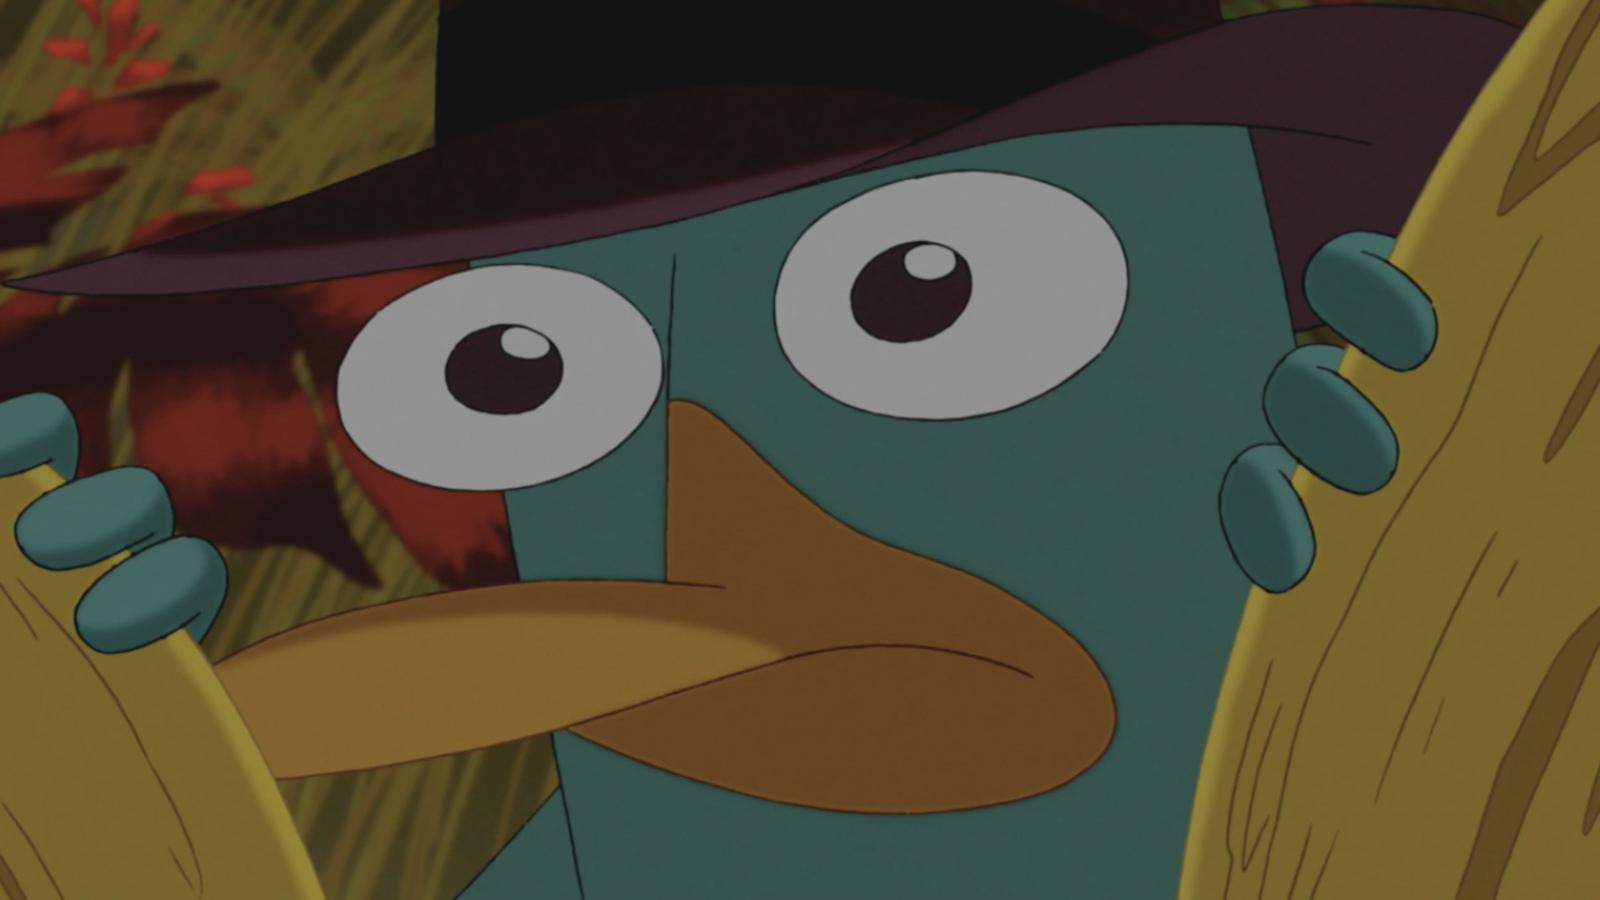

In [12]:
# Plot one random histogram for each class
filename_perry, hist_perry = random.choice(list(index_rgb_perry.items()))
path = os.path.join(path_ivan,"train","perry the platypus_aug",filename_perry)
print(path)
image = cv2.imread(path)
cv2_imshow(image)
px.bar(hist_perry, title='Perry')

/content/drive/MyDrive/UPM/MÁSTER/SEGUNDO/LSMA/FINAL-PROJECT/DATA/train/platypus_aug/contrast_29.jpg


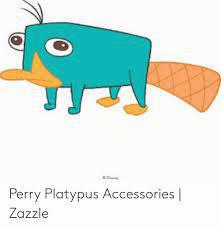

In [13]:
filename_platy, hist_platy = random.choice(list(index_rgb_platy.items()))
path = os.path.join(path_ivan,"train","platypus_aug",filename_platy)
print(path)
image = cv2.imread(path)
cv2_imshow(image)
px.bar(hist_platy, title='Platypus')

This problem is very color-dependant. It is not easy to distinguish color patterns from the RGB histogram, but the HSV histogram might be more useful:

https://en.wikipedia.org/wiki/HSL_and_HSV

### 2. HSV Histogram

In [14]:
def compute_HSV_histogram(image):
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hist = cv2.calcHist([hsv], [0, 1], None, [6, 8], [0, 180, 0, 256])
  return hist

In [15]:
index_hsv_platy = {}

# loop over the platypus images
for imagePath in paths.list_images(os.path.join(path_ivan,"train","platypus_aug")):
    # load the image and describe it
    image = cv2.imread(imagePath)
    hist = compute_HSV_histogram(image)

    # update the index dictionary
    filename = imagePath.split(os.sep)[-1]
    index_hsv_platy[filename] = hist

In [16]:
index_hsv_perry = {}

# loop over the platypus images
for imagePath in paths.list_images(os.path.join(path_ivan,"train","perry the platypus_aug")):
    # load the image and describe it
    image = cv2.imread(imagePath)
    assert image is not None
    hist = compute_HSV_histogram(image)

    # update the index dictionary
    filename = imagePath.split(os.sep)[-1]
    index_hsv_perry[filename] = hist

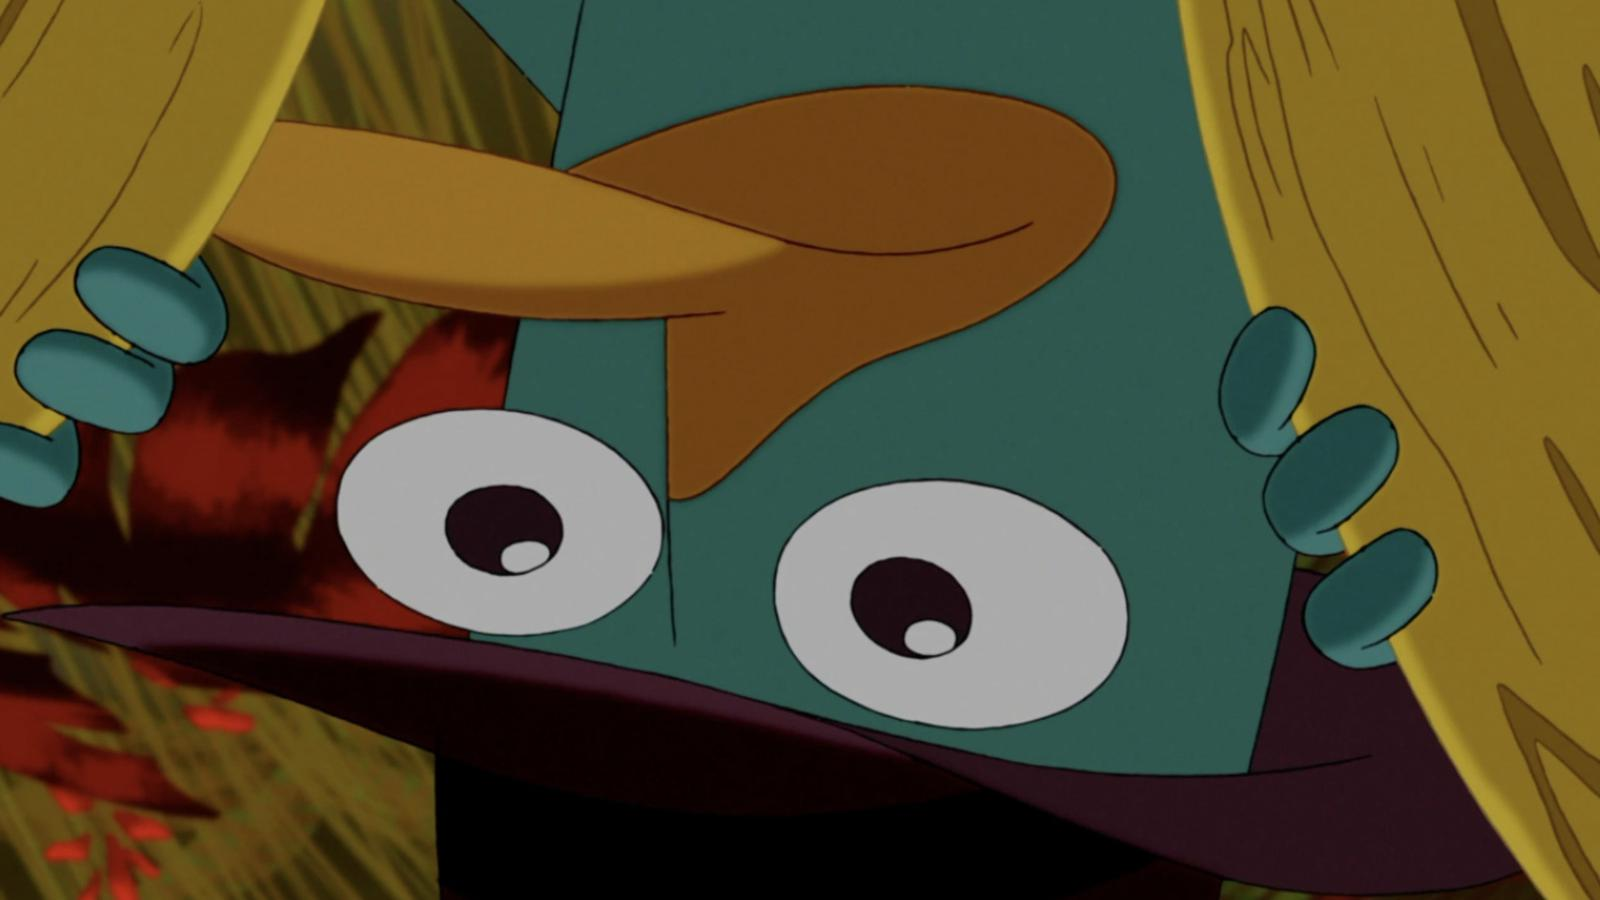

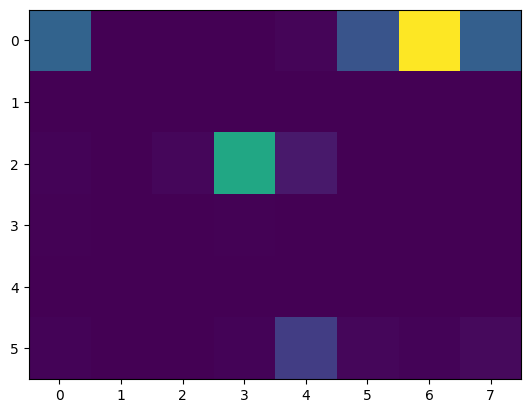

In [17]:
# Plot one random histogram for each class
filename_perry, hist_perry = random.choice(list(index_hsv_perry.items()))
image = cv2.imread(os.path.join(path_ivan,"train","perry the platypus_aug",filename_perry))
cv2_imshow(image)
plt.imshow(hist_perry,interpolation = 'nearest')
plt.show()

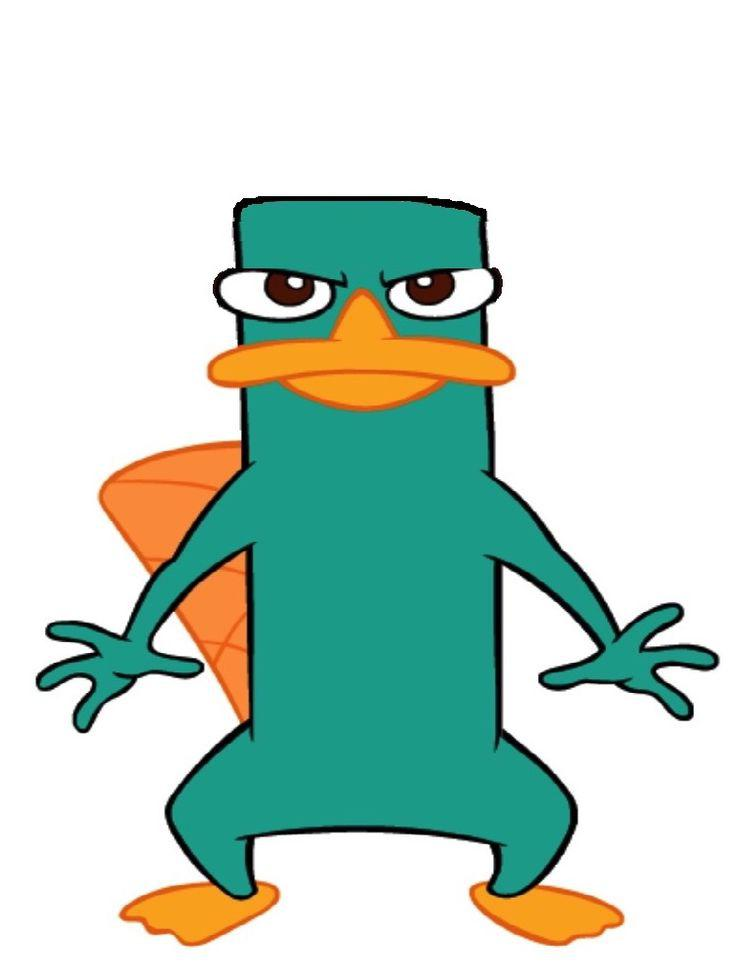

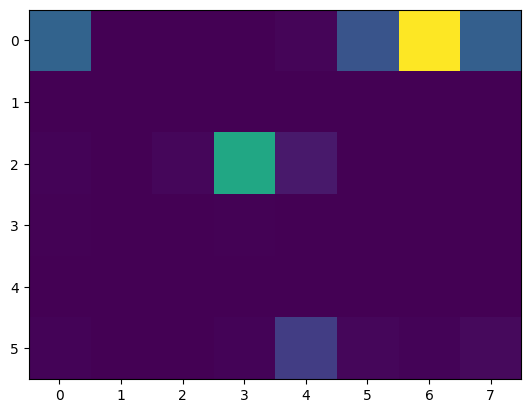

In [18]:
filename_platy, hist_platy = random.choice(list(index_hsv_platy.items()))
image = cv2.imread(os.path.join(path_ivan,"train","platypus_aug",filename_platy))
cv2_imshow(image)
plt.imshow(hist_perry,interpolation = 'nearest')
plt.show()